# Solutions to Applied Statistics Assessment

In [26]:
# Mathematical functions from the standard library
import math

# Permutations and combinations
import itertools

# Random selections
import random

# Numerical structures and applications
import numpy as np

# Plotting
import matplotlib.pyplot as plt

## Introduction

## Problem 1: Extending the Lady Tasting Tea Experiment

### __Brief__: 

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

### __Solution:__

#### Background

The lady tasting tea is a famous statistical experiment devised by [Ronald A. Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) to investigate a woman's claim that she could distinguish whether milk was poured first into a cup of tea or if the tea was poured in first. This [Irish TImes article](https://www.irishtimes.com/news/science/how-a-tea-tasting-test-led-to-a-breakthrough-in-statistics-1.3998786) provides a easy to understand explanation of the lady tasting tea experiment for the non-statistician. 

In the original experiment eight cups of tea were presented to the lady - four with milk first and four with tea first. They were identical in all other respects and were presented in a _random_ order. Fisher aimed to calculate the probability, _p_ that the lady was selecting the four milk first cups purely by chance.

As part of this experiment, Fisher introduced the ``null hypothesis``, _H<sub>0</sub>_ and the ``alternative hypothesis``,  _H<sub>a</sub>_. The null hypothesis is the default position and is assumed to be true unless proven otherwise. The alternative hypothesis opposes the null hypothesis and assumes a relationship between the variables. As stated in this article, [Alternative Hypothesis: Definition, Types and Examples](https://www.geeksforgeeks.org/maths/alternative-hypothesis-definition-types-and-examples/)  
>"The null and alternative hypotheses are exhaustive, meaning that together they cover every possible outcome. They are also mutually exclusive, meaning that only one can be true at a time".

For the original lady tasting tea experiment the null hypothesis and the alternative hypothesis are as follows:

>__Null Hypothesis _H<sub>0</sub>_:__
>
>* The lady has no special powers to tell the difference between cups of tea with milk in first and cups of tea with tea in first.
>* The lady is selecting the four cups from eight at random.
>
>__Alternative Hypothesis _H<sub>a</sub>_:__
>* The lady can tell the difference. 

Randomisation of the order of the cups and the order in which the cups were presented to the lady is a key component of the experiment. As discussed in [The historical and statistical significance of the lady tasting tea experiment](https://jyyna.co.uk/lady-tasting-tea/) randomisation eliminates selection bias ensuring that each cup has an equal chance of being selected and facilitates statistical analysis as statistical tests assume randomness. As an aside, the author replicated the experiment with his friends - none of them could match the lady's accuracy!

[Probability](https://statisticsbyjim.com/probability/probability-fundamentals/) is the measure of likelihood of an event occurring, expressed as a value between 0 and 1, where 0 is impossible and 1 is certain. A low _p_ indicates evidence against the null hypothesis. [Combinatorial maths](https://www.geeksforgeeks.org/engineering-mathematics/combinatorics/) is used to calculate the probability of the lady selecting at random the four milk in first cups from eight cups. The [class lecture notes by Ian McLoughlin](https://github.com/ianmcloughlin/applied-statistics/blob/main/materials/lady-tasting-tea.ipynb) provides a more detailed explanation of how to perform this calculation with Python.

 $\binom{n}{k} = \frac{n!}{k!(n-k)!}$ where ${n}$ is the total number of cups and ${k}$ is the number of cups with milk in first. 

Using this equation the probability, _p_ of correctly identifying at random all four milk first cups, where ${n}$ is 8 and ${k}$ is 4 is 1/70. In other words, if she is choosing at random, she has a one in seventy chance or a probability of 0.014 of correctly selecting the four cups with milk in first. Fisher also chose a significance level, α of 0.05. As he states in page 13 of [The Design of Experiments](https://home.iitk.ac.in/~shalab/anova/DOE-RAF.pdf): 
>"It is open to the experimenter to be more or less exacting in respect of the smallness of the probability he would require before he would be willing to admit that his observations have demonstrated a positive result". 

A p-value below the significance level of 0.05 indicates that there is a less than 5% chance of observing the results if the null hypothesis were true. ADD reference. 

Since the probability of selecting the four cups at random is smaller than the significance level we can say that the null hypothesis is rejected in favour of the alternative hypothesis.  
As the lady correctly selected all four milk first cups we can say that she can indeed detect if milk or tea has been poured first into the cup. 

### The Experiment

The problem requires the use of numpy to simulate the experiment of choosing four cups of milk in first tea from twelve cups of tea. 

* __Define the null hypothesis, the alternative hypothesis and the significance level.__
  
   >__Null Hypothesis _H<sub>0</sub>_:__
   >* The lady has no special powers to tell the difference between cups of tea with milk in first and cups of tea with tea in first.
   >* The lady is selecting the four cups from twelve at random.
   >

   >__Alternative Hypothesis _H<sub>a</sub>_:__
   >* The lady can tell the difference. 
   >

   >__Significance level, α:__ 0.05

* Set the number of times to simulate the experiment. 
   
   As the brief says 'many times', I chose to repeat the experiment 10,000,000 times. This will give a more accurate estimate of the probability.   Repetition reduces the 

In [27]:
# Number of simulation runs.
num_simulations = 10_000_00

* Set up a counter to track the number of successful outcomes. 

In [28]:
# Counter for the number of times the guess matches the milk in first selection.
success = 0

The following steps will be repeated by the number of simulation runs. 

* __Create cup labels:__
  
  Set up a numpy array with 12 labels from 0 to 11 inclusive with ``numpy.arange()``. The [official documentation](https://numpy.org/doc/stable/reference/generated/numpy.arange.html) for numpy.arange() states that it returns an array of evenly spaced values within a given interval.  This array will represent the labels on the twelve cups. The stop value is excluded from the array. 
 
   ```python
   numpy.arange([start, ]stop, [step, ]dtype=None)
   ```

In [29]:
# Create an array of 10 values from 0 to 9. 
demo = np.arange(10)
demo

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

* __Shuffle the labels:__ 

   The brief states that the arrays must be shuffled many times. This is accomplished using [numpy.random.shuffle()](https://numpy.org/doc/stable/reference/random/generated/numpy.random.shuffle.html) which randomly shuffles the labels. This function modifies the array in place, so each run may produce a different permutation. 

In [30]:
# Shuffle an array.
np.random.shuffle(demo)
demo

array([9, 8, 3, 1, 0, 4, 5, 7, 2, 6])

* __Select cups for milk in first:__
   
  Choose four labels from the cups array to be milk in first. 

   To choose four cups from the array, the function ``numpy.random.choice()`` was used. The [official documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) states that ``numpy.random.choice()`` generates a random sample from a given 1-D array.
   
   It has three parameters:

   ```python 
   numpy.random.choice(a, size=None, replace=True, p=None)
   ```
    
   * __a:__ the array to sample from

   * __size:__ the number of elements to select (4)

   * __replace:__ either True or False. 
    
   If the replace parameter is True, the function samples with replacement. This is the default.
   
   For this experiment ``replace = False`` as we want to sample without replacement. Once a cup is chosen, it is not replaced back into the array. 


   The array is sorted in ascending order with [np.sort()](https://numpy.org/doc/stable/reference/generated/numpy.sort.html), which returns a sorted copy of an array. This will make the comparison step between the two arrays simpler as the position of the element matters when comparing arrays.

In [31]:
# Select a random sample from np.arange(5) of size 3. Sample with replacement is the default. 
np.random.choice(5, 3)

array([3, 2, 2])

As demonstrated above with replace = True the same value can be selected more than once. 

In [32]:
# Select a random sample from np.arange(5) of size 3 with sampling without replacement.
np.random.choice(5, 3, replace = False)

array([0, 4, 1])

Each value can only appear once when sampling without replacement. 

In [33]:
# Values are chosen and the array is sorted inplace. 
np.sort(np.random.choice(5, 3, replace = False))

array([0, 2, 3])

* __Select the guess:__
  
  In the next step, four cups are randomly selected to represent the guess of which four cups are milk first. The functions ``numpy.random.choice()`` and ``numpy.sort()`` are used again to randomly select and then sort four labels from the cups array. 

* __Compare results:__ 
 
Compare the milk first array with the guess array using ``numpy.array_equal()``. This function [numpy.array_equal()](https://numpy.org/doc/stable/reference/generated/numpy.array_equal.html) compares two arrays elementwise, which is why both arrays are sorted in ascending order using ``np.sort()`` in the previous steps. It returns ``True`` if the two arrays have the same shape and elements. 

```python
numpy.array_equal(a1, a2, equal_nan=False)[source] where a1 and a2 are the arrays

```

The different methods to compare arrays is discussed in this question on [stackoverflow](https://stackoverflow.com/questions/10580676/comparing-two-numpy-arrays-for-equality-element-wise). Other suggested methods included use of ``numpy.all()`` and ``numpy.aquiv()``.

In [34]:
# Two arrays with identical labels but in different positions .
a1 = [1, 2, 3, 4, 5]
a2 = [1, 2, 3, 5, 4]

np.array_equal(a1, a2)

False

In [35]:
# Two arrays with identical labels and postions.
a1 = [1, 2, 3, 4, 5]
a2 = [1, 2, 3, 4, 5]

np.array_equal(a1, a2)

True

* __Record success:__ 
  
  If the arrays match, record the result as success. A success occurs when the four guessed cups match the four milk first cups. 

* __Repeat the process__.

Repeat the above process of creating the array of 12 cups, shuffle the array, select four milk first cups, guess which cups are milk first and compare the guess array with the milk first array. 

In [36]:
# Run the simulation multiple times to calculate the frequency of successful outcomes.
for _ in np.arange(num_simulations):
    # Create an array representing 12 cups labeled 0-11 inclusive.
    cups = np.arange(0, 12)

    # Randomly shuffle the cups.
    np.random.shuffle(cups)

    # Randomly choose 4 cups that have milk added first. Sample without replacement.
    # Sort the array.
    milk_first_cups = np.sort(np.random.choice(cups, size = 4, replace = False))

    # Randomly guess which cups have milk added first. Sample without replacement.
    # Sort the array.
    guess = np.sort(np.random.choice(cups, size = 4, replace= False))
    
    # If the guess matches the milk selection, count it as a success.
    if np.array_equal(milk_first_cups, guess):
        success += 1

In [37]:
# Show the number of successful outcomes. 
f'There were {success} of successful outcomes from {num_simulations}.'

'There were 2016 of successful outcomes from 1000000.'

* Calculate the probability with the following formula:
 
    $p = \frac{success}{no. of simulations}$

In [38]:
# Calculate the probability of success.
probability = success/num_simulations
print(f'The probability of the lady correctly selecting the four milk first cups from twelve cups is: {probability}.')

The probability of the lady correctly selecting the four milk first cups from twelve cups is: 0.002016.


The probability of the lady correctly selecting the four milk first cups from twelve by random guessing is 0.002 or a 2 in a 1000 chance. This compares to a probability of 0.014 for the original eight cup experiment. Since the probability is below the significance level (α = 0.05), there is sufficient evidence to reject the null hypothesis if the lady does correctly identify the four milk first cups. We can then conclude that the lady can tell the difference between the milk first and tea first cups. 


The p-value is defined as the probability of obtaining test results at least as extremem as the result acutually observed, under the assumption that the null hypothesis is correct. A small p-value means that 
https://en.wikipedia.org/wiki/P-value

https://statisticsbyjim.com/hypothesis-testing/interpreting-p-values/

https://www.investopedia.com/terms/p/p-value.asp

https://www.simplypsychology.org/p-value.html

Consider extending or relaxing the p-value threshold compared to the original design??

https://statistics.laerd.com/statistical-guides/hypothesis-testing-3.php

***

## Problem 2: Normal Distribution

__Brief__: Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

### __Solution:__

Generate samples  - https://www.datacamp.com/doc/numpy/random-normal Generate a 2D array for simulation. 

How to get normally distributed random numbers with NumPy https://realpython.com/numpy-random-normal/ Size as a tuple to create _N_-dimensional arrays. 

In [39]:
# Generate an arry of 10 random numbers with standard normal distribution with a mean of 0 and a standard deviation of 1.
samples = np.random.normal(loc=0.0, scale=1.0, size=10)
samples

array([ 0.33113356,  0.61866681, -0.27498338, -0.73216572,  0.53954234,
        0.1465498 ,  0.38585519,  1.57970576,  0.99548034,  1.50069556])

In [40]:
# Generate 100000 samples with a size of 10.
many_samples = np.random.normal(loc=0.0, scale=1.0, size=(100000, 10))
many_samples

array([[-0.40606737,  0.22340768, -0.52670636, ...,  0.75420214,
         0.6525567 , -1.82174806],
       [ 0.79423976, -1.13059987,  0.43887862, ..., -0.65134856,
        -0.27702683, -2.00410865],
       [-0.67349102, -0.18020518,  0.75494355, ..., -0.027309  ,
        -2.08126363, -0.72243865],
       ...,
       [-0.68370734,  1.41935446, -0.63344313, ..., -0.67603128,
        -0.09325354,  0.37687757],
       [-0.29754798,  1.81017666,  1.47923857, ...,  0.44017155,
         1.34305363,  0.99536503],
       [-0.99870968,  0.22660804, -2.13294856, ..., -0.25359054,
         0.38215198,  0.14699148]], shape=(100000, 10))

In [41]:
std_with_ddof_1 = np.std(samples, ddof = 1)
std_with_ddof_1

np.float64(0.7236318278205971)

In [42]:
std_with_ddof_0 = np.std(samples, ddof = 0)
std_with_ddof_0

np.float64(0.6864974289911656)

In [43]:
std_with_ddof_0_many = np.std(many_samples, ddof = 0)
std_with_ddof_0_many

np.float64(1.0002172454063805)

In [44]:
import numpy as np
# population std deviation
data = [1, 2, 3, 4, 5]
std_dev_ddof = np.std(data, ddof=0)
print(std_dev_ddof)


1.4142135623730951


In [45]:
# sample std deviation
data = [1, 2, 3, 4, 5]
std_dev_ddof = np.std(data, ddof=1)
print(std_dev_ddof)


1.5811388300841898


Axis along which the standard deviation is calculated. Default is none computing over the entire array. axis = 1 computes for each row/sample in the array. axis = 0 computes for each column.

In [46]:
std_with_ddof_1_many = np.std(many_samples, ddof = 1, axis= 1)
std_with_ddof_1_many

array([0.95048866, 1.04776893, 1.11657308, ..., 0.62802928, 0.98249242,
       1.08605535], shape=(100000,))

In [47]:
std_with_ddof_0_many = np.std(many_samples, ddof = 0, axis= 1)
std_with_ddof_0_many

array([0.90171271, 0.99400088, 1.05927424, ..., 0.59580089, 0.93207415,
       1.03032257], shape=(100000,))

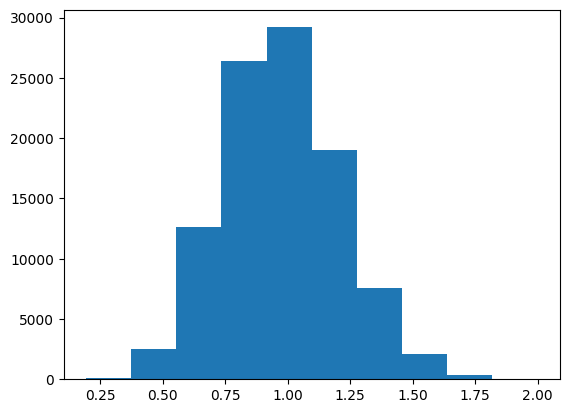

In [48]:

plt.hist(std_with_ddof_1_many)
plt.show()

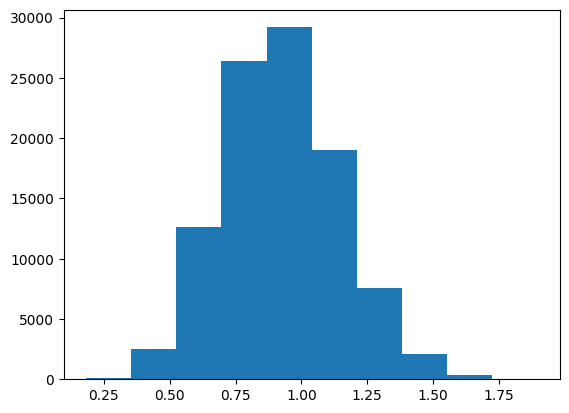

In [49]:
plt.hist(std_with_ddof_0_many)
plt.show()

For each sample compute the standard deviation with ddof = 1 (sample SD) and with ddof = 0 (population SD).

 https://numpy.org/doc/stable/reference/generated/numpy.std.html

 What's ddof? ddof delta degress of freedom. default ddof = 0. 
 ddof= 0 population standard deviation

 ddof= 1

 std =  sqrt of variance. 


In [50]:
# From https://numpy.org/doc/stable/reference/generated/numpy.std.html
#N = len(a)
#d2 = abs(a - mean)**2  # abs is for complex `a`
#var = d2.sum() / (N - ddof)  # note use of `ddof`
#std = var**0.5

plot histograms of of both sets of values (standard deviation?) on the same axes with transparency

describe the differences

explain how you expect these differences to change if the sample size is increased.

## Problem 3: t-Tests

__Brief__: A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference _d_ = 0, 0.1, 0.2, …, 1.0, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean _d_ and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.
   
Plot this proportion against _d_, and explain how the type II error rate changes as the difference in means increases.

## Problem 4: ANOVA

__Brief__: Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.
   
Write a short note on why ANOVA is preferred over running several t-tests.

End
***